In [16]:
import pickle
from collections import defaultdict
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_curve, roc_auc_score
import numpy as np
import matplotlib.pylab as plt

In [2]:
fileVizMap = pickle.load(open("../evals/BertBest/vizmap.pkl", "rb"))

In [3]:
def make_zero_one(wts):
    wts = np.array(wts)
    return [1 if i > 0.5 else 0 for i in wts]

In [4]:
def normalize(v):
    return v
#     den = np.max(v) - np.min(v)
#     return (v-np.min(v)) / den

In [11]:
sentence_map = defaultdict(list)
word_map = defaultdict(list)
y_true_list, y_pred_list = [], []
for idx, sentence in enumerate(fileVizMap['scores']['text']):
    y_pred, y_true = make_zero_one(normalize(fileVizMap['scores']['wts'][idx])), make_zero_one(normalize(fileVizMap['target']['wts'][idx]))
    y_true_list.extend(make_zero_one(normalize(fileVizMap['target']['wts'][idx])))
    y_pred_list.extend(normalize(fileVizMap['scores']['wts'][idx]))
    acc = accuracy_score(y_true, y_pred)
    word_map[len(sentence.split(' '))].append(sentence)
    sentence_map[len(sentence.split(' '))].append(acc)

In [6]:
x_list = []
y_list_bert = []
for x in sorted(sentence_map.keys()):
    x_list.append(x)
    y_list_bert.append(np.mean(sentence_map[x]))
max(x_list), min(x_list), word_map[38]
x_list = np.array(x_list)

In [7]:
xg = open('csvs/xgboost_pred.csv', 'r').read()
y_list_xg = list(map(float, xg.split(',')))
mlp = open('csvs/mlp_pred.csv', 'r').read()
y_list_mlp = list(map(float, mlp.split(',')))
lr = open('csvs/log_reg_pred.csv', 'r').read()
y_list_lr = list(map(float, lr.split(',')))
y_list_bert[:5]

[0.109375, 0.28104575163398693, 0.46774193548387094, 0.575, 0.6354166666666666]

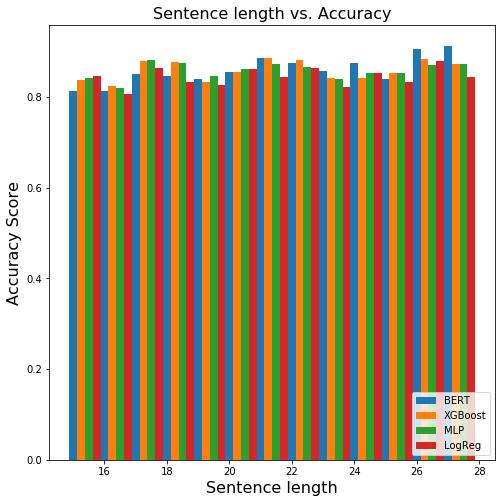

In [88]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
ax.bar(x_list[-15:-2]+0.00,y_list_bert[-15:-2], label="BERT", width=0.25)
ax.bar(x_list[-15:-2]+0.25,y_list_xg[-15:-2], label="XGBoost", width=0.25)
ax.bar(x_list[-15:-2]+0.50,y_list_mlp[-15:-2], label="MLP", width=0.25)
ax.bar(x_list[-15:-2]+0.75,y_list_lr[-15:-2], label="LogReg", width=0.25)
ax.set_xlabel("Sentence length",fontsize=16)
ax.set_ylabel("Accuracy Score",fontsize=16)
ax.set_title("Sentence length vs. Accuracy",fontsize=16)
plt.legend(loc="lower right")
plt.show()
# plt.savefig('Accuracy_Result.png')

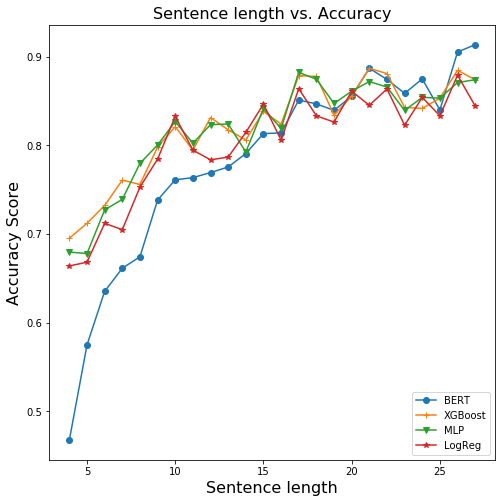

In [95]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
ax.plot(x_list[2:-2],y_list_bert[2:-2], marker='o', label="BERT")
ax.plot(x_list[2:-2],y_list_xg[2:-2], marker='+', label="XGBoost")
ax.plot(x_list[2:-2],y_list_mlp[2:-2], marker='v', label="MLP")
ax.plot(x_list[2:-2],y_list_lr[2:-2], marker='*', label="LogReg")
ax.set_xlabel("Sentence length",fontsize=16)
ax.set_ylabel("Accuracy Score",fontsize=16)
ax.set_title("Sentence length vs. Accuracy",fontsize=16)
plt.legend(loc="lower right")
plt.show()
# plt.savefig('Accuracy_Result.png')

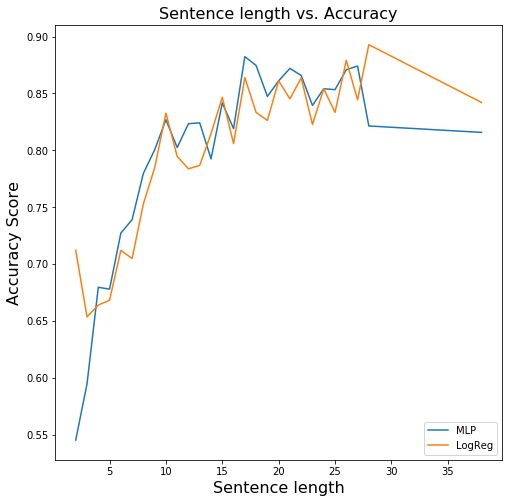

In [80]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
# ax.plot(x_list,y_list_bert, label="BERT")
# ax.plot(x_list,y_list_xg, label="XGBoost")
ax.plot(x_list,y_list_mlp, label="MLP")
ax.plot(x_list,y_list_lr, label="LogReg")
ax.set_xlabel("Sentence length",fontsize=16)
ax.set_ylabel("Accuracy Score",fontsize=16)
ax.set_title("Sentence length vs. Accuracy",fontsize=16)
plt.legend(loc="lower right")
plt.show()
# plt.savefig('Accuracy_Result.png')

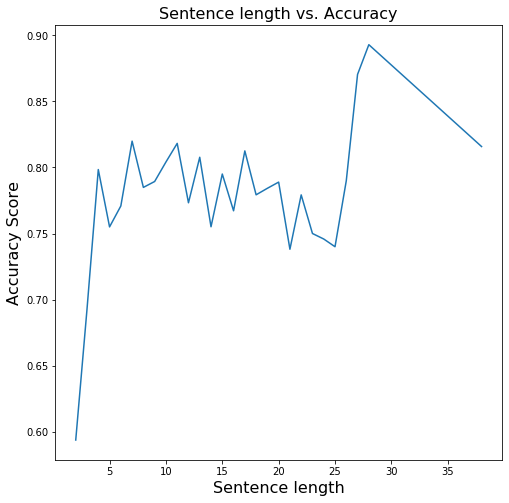

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
ax.plot(x_list,y_list)
ax.set_xlabel("Sentence length",fontsize=16)
ax.set_ylabel("Accuracy Score",fontsize=16)
ax.set_title("Sentence length vs. Accuracy",fontsize=16)
plt.show()
# plt.savefig('Accuracy_Result.png')

In [25]:
y_true_list = pickle.load(open('../evals/BertBest/y_true.pkl', 'rb'))
y_pred_list = pickle.load(open('../evals/BertBest/y_pred.pkl', 'rb'))
len(y_true_list), len(y_pred_list)

(12501, 12501)

BERT: ROC AUC=0.936


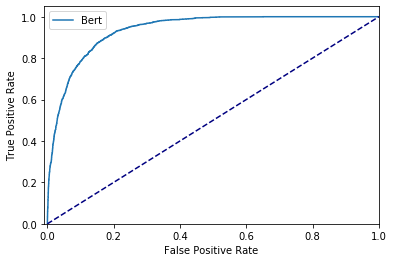

In [32]:
import pickle
bert_fpr, bert_tpr, _ = roc_curve(y_true_list, y_pred_list)
bert_auc = roc_auc_score(y_true_list, y_pred_list)
# summarize scores
print('BERT: ROC AUC=%.3f' % (bert_auc))
# plot the roc curve for the model
plt.plot(bert_fpr, bert_tpr, label='Bert')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()